# Regressor with keras
[参考链接](https://morvanzhou.github.io/tutorials/machine-learning/keras/2-1-regressor/)

models.Sequential，用来一层一层一层的去建立神经层； layers.Dense 意思是这个神经层是全连接层。

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt # 可视化模块

/home/liyang22/tensorflow-py3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/liyang22/tensorflow-py3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/liyang22/tensorflow-py3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/liyang22/tensorflow-py3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# 准备数据

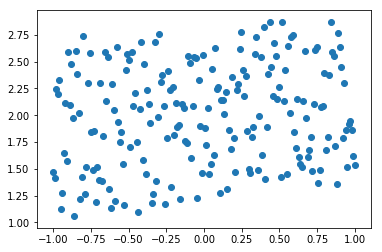

In [2]:
# create some data
X1 = np.linspace(-1, 1, 200)
np.random.shuffle(X1)    # randomize the data
X2 = np.linspace(-1, 1, 200)
np.random.shuffle(X2)    # randomize the data

Y = 0.2 * X1 + 0.8*X2  + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X1, Y)
plt.show()


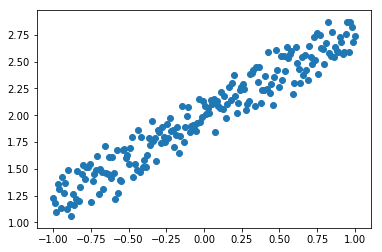

In [3]:
plt.scatter(X2, Y)
plt.show()


In [4]:
X_train = []
X_test = []
Y_train = []
Y_test = []
for i in range(160):
    X_train.append([X1[i], X2[i]])
    Y_train.append(Y[i])
X_train = np.array(X_train)
Y_train = np.array(Y_train)


for i in range(160, 200):
    X_test.append([X1[i], X2[i]])
    Y_test.append(Y[i])
X_test = np.array(X_test)
Y_test = np.array(Y_test)


# 然后用 Sequential 建立 model， 
再用 model.add 添加神经层，添加的是 Dense 全连接神经层。

参数有两个，一个是输入数据和输出数据的维度，本代码的例子中 x 是二维和 y 是一维的。

如果需要添加下一个神经层的时候，不用再定义输入的纬度，因为它默认就把前一层的输出作为当前层的输入。在这个例子里，只需要一层就够了。

In [5]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=2))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, input_dim=2)`
  


# 激活模型 
接下来要激活神经网络，上一步只是定义模型。

参数中，误差函数用的是 mse 均方误差；优化器用的是 sgd 随机梯度下降法。

In [6]:
model.compile(loss='mse', optimizer='sgd')

# 训练模型 
训练的时候用 model.train_on_batch 一批一批的训练 X_train, Y_train。默认的返回值是 cost，每100步输出一下结果。

In [7]:
# training
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
train cost:  5.587938
train cost:  0.5890821
train cost:  0.15103412
train cost:  0.044782154


# 检验模型

In [8]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)



Testing ------------
40/40 [==============================] - 0s 532us/step
test cost: 0.042044781148433685


In [9]:
weights = model.layers[0].get_weights()

In [10]:
print(type(weights))

<class 'list'>


In [11]:
for w in weights:
    print(w)

[[0.00312033]
 [0.49718547]]
[1.9800707]


In [12]:
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

Weights= [[0.00312033]
 [0.49718547]] 
biases= [1.9800707]


In [13]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

# 可视化模型

![]('./model.png')

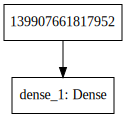

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))